# Team AIBaas

CNN Main Notebook 
Authors :
Ilukkumbura IMEIB
Nadha 
Boralugoda

In [1]:
!pip install pip install tensorflow keras matplotlib scikit-learn


ERROR: Could not find a version that satisfies the requirement install (from versions: none)

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for install


In [2]:
from pathlib import Path
root = Path(r"E:\SEM5\PR\CNN\CNN\Dataset\Jute_Pest_Dataset")

# Print immediate children
print("Top-level folders/files:")
for p in sorted(root.iterdir()):
    print(" ", p.name)

# Find class folders in case dataset already splitted
def find_class_dirs(base):
    classes = []
    for p in base.iterdir():
        if p.is_dir():
            # heuristics: folder contains many image files
            img_count = len(list(p.glob("*.jpg"))) + len(list(p.glob("*.png")))
            if img_count > 0:
                classes.append((p.name, img_count))
    return classes

print("\nClass folders at root (name, count):")
print(find_class_dirs(root))

# Also check train/val/test subdirs
for split in ["train","val","test"]:
    s = root / split
    if s.exists():
        print(f"\nFound {split} folder with class counts:")
        print(find_class_dirs(s))


Top-level folders/files:
  test
  train
  val

Class folders at root (name, count):
[]

Found train folder with class counts:
[('Beet Armyworm', 199), ('Black Hairy', 309), ('Cutworm', 399), ('Field Cricket', 392), ('Jute Aphid', 530), ('Jute Hairy', 414), ('Jute Red Mite', 457), ('Jute Semilooper', 372), ('Jute Stem Girdler', 281), ('Jute Stem Weevil', 676), ('Leaf Beetle', 297), ('Mealybug', 466), ('Pod Borer', 384), ('Scopula Emissaria', 320), ('Termite', 291), ('Termite odontotermes (Rambur)', 301), ('Yellow Mite', 342)]

Found val folder with class counts:
[('Beet Armyworm', 40), ('Black Hairy', 30), ('Cutworm', 18), ('Field Cricket', 14), ('Jute Aphid', 27), ('Jute Hairy', 8), ('Jute Red Mite', 49), ('Jute Semilooper', 3), ('Jute Stem Girdler', 6), ('Jute Stem Weevil', 71), ('Leaf Beetle', 6), ('Mealybug', 35), ('Pod Borer', 3), ('Scopula Emissaria', 5), ('Termite', 26), ('Termite odontotermes (Rambur)', 36), ('Yellow Mite', 30)]

Found test folder with class counts:
[('Beet Army

In [3]:
import tensorflow as tf

Found 6443 files belonging to 17 classes.
Found 6443 files belonging to 17 classes.
Found 413 files belonging to 17 classes.
Found 379 files belonging to 17 classes.


In [ ]:
directory = r"E:\SEM5\PR\CNN\CNN\Dataset\Jute_Pest_Dataset\train"
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(128, 128),  # keep small for now
    batch_size=32
)
train_raw = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(128, 128),  # keep small for now
    batch_size=32
)
directory = r"E:\SEM5\PR\CNN\CNN\Dataset\Jute_Pest_Dataset\val"
val_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(128, 128),  # keep small for now
    batch_size=32
)
directory = r"E:\SEM5\PR\CNN\CNN\Dataset\Jute_Pest_Dataset\test"
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(128, 128),  # keep small for now
    batch_size=32
)

# Normalize pixel values from [0,255] → [0,1]
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [31]:
from tensorflow import keras
from tensorflow.keras import layers, models

num_classes = len(train_raw.class_names)

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(num_classes, activation='softmax')
])


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 17)             │         2,193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,394,513 (28.21 MB)

 Trainable params: 7,394,513 (28.21 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(
    optimizer='adam',                         # we’ll discuss this choice later for your report
    loss='sparse_categorical_crossentropy',   # since labels are integer IDs
    metrics=['accuracy']
)


In [35]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)


Epoch 1/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 44s 214ms/step - accuracy: 0.0927 - loss: 103.9406 - val_accuracy: 0.1743 - val_loss: 2.7798
Epoch 2/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 48s 236ms/step - accuracy: 0.1926 - loss: 2.5801 - val_accuracy: 0.2131 - val_loss: 2.6320
Epoch 3/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 48s 236ms/step - accuracy: 0.3512 - loss: 2.1611 - val_accuracy: 0.2494 - val_loss: 2.6213
Epoch 4/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 52s 258ms/step - accuracy: 0.4975 - loss: 1.6619 - val_accuracy: 0.2470 - val_loss: 2.9933
Epoch 5/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 52s 254ms/step - accuracy: 0.6224 - loss: 1.2705 - val_accuracy: 0.2978 - val_loss: 3.2769
Epoch 6/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 55s 271ms/step - accuracy: 0.7060 - loss: 1.0320 - val_accuracy: 0.2978 - val_loss: 3.5602
Epoch 7/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 55s 274ms/step - accuracy: 0.7802 - loss: 0.7979 - val_accuracy: 0.3390 - val_loss: 4.0365
Epoch 8/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 54s 265ms/step - accuracy: 0.7999 - loss:

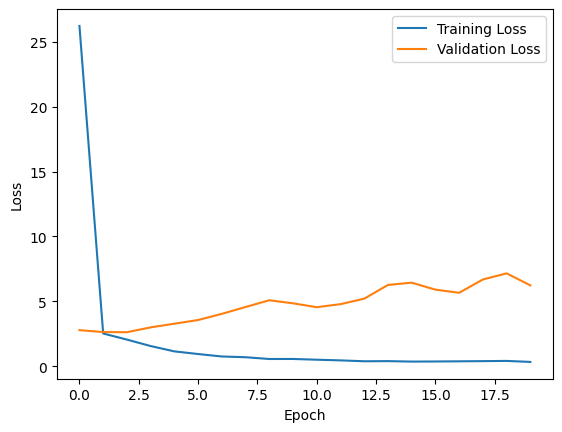

In [36]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [37]:
test_loss, test_acc = model.evaluate(test_ds)
print("Test Accuracy:", test_acc)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.2518 - loss: 6.9610
Test Accuracy: 0.24802111089229584


In [38]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Gather all predictions and true labels
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred = np.concatenate([np.argmax(model.predict(x), axis=1) for x, y in test_ds], axis=0)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Precision, Recall, F1
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=test_ds.class_names))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Confusion Matrix:
 [[0 1 0 1 2 0 2 3 1 2 3 2 0 0 0 1 2]
 [0 0 2 1 1 0 4 2 1 1 0 3 0 0 1 2 2]
 [0 1 0 1 2 4 2 2 0 2 1 2 0 2 0 1 0]
 [0 2 0 2 3 1 0 1 3 2 1 3 0 0 0 1 1]
 [1 0 2 3 2 2 0 2 3 0 2 2 0 0 0 2 1]
 [0 1 0 1 2 3 1 0 2 5 0 1 1 1 1 1 0]
 [0 0 2 1 8 1 0 1 1 4 2 3 1 0 0 0 0]
 [0 0 2 0 2 3 2 2 2 3 0 2 0 0 0 2 1]
 [0 0 1 0 6 0 3 1 1 3 2 0 1 2 1 0 3]
 [0 2 0 3 2 3 1 1 1 5 0 1 0 1 2 0 2]
 [0 0 2 0 4 2 1 2 3 4 1 2 0 1 1 1 0]
 [1 0 2 1 2 0 3 4 0 6 2 2 0 1 0 0 0]
 [0 0 1 3 3 1 3 2 2 1 1 2 0 2 0 2 1]
 [0 1 2 3 5 2 3 2 1 1 0 1 0 0 1 0 2]
 [0 1 

In [ ]:
directory = r"E:\SEM5\PR\CNN\CNN\Dataset\Jute_Pest_Dataset\train"
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(128, 128),  # keep small for now
    batch_size=32
)
train_raw = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(128, 128),  # keep small for now
    batch_size=32
)
directory = r"E:\SEM5\PR\CNN\CNN\Dataset\Jute_Pest_Dataset\val"
val_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(128, 128),  # keep small for now
    batch_size=32
)
directory = r"E:\SEM5\PR\CNN\CNN\Dataset\Jute_Pest_Dataset\test"
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(128, 128),  # keep small for now
    batch_size=32
)

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))



# Normalize pixel values from [0,255] → [0,1]
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [40]:
model2 = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(num_classes, activation='softmax')
])


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
model2.compile(
    optimizer='adam',                         # we’ll discuss this choice later for your report
    loss='sparse_categorical_crossentropy',   # since labels are integer IDs
    metrics=['accuracy']
)


In [42]:
history = model2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)


Epoch 1/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 43s 201ms/step - accuracy: 0.0839 - loss: 9.4098 - val_accuracy: 0.1719 - val_loss: 2.8203
Epoch 2/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 44s 215ms/step - accuracy: 0.1076 - loss: 2.8167 - val_accuracy: 0.1719 - val_loss: 2.8099
Epoch 3/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 44s 216ms/step - accuracy: 0.1070 - loss: 2.8074 - val_accuracy: 0.1719 - val_loss: 2.8034
Epoch 4/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 44s 217ms/step - accuracy: 0.1095 - loss: 2.8006 - val_accuracy: 0.1719 - val_loss: 2.7997
Epoch 5/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 43s 211ms/step - accuracy: 0.1077 - loss: 2.7972 - val_accuracy: 0.1719 - val_loss: 2.7968
Epoch 6/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 47s 234ms/step - accuracy: 0.1076 - loss: 2.7954 - val_accuracy: 0.1719 - val_loss: 2.7958
Epoch 7/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 47s 230ms/step - accuracy: 0.1094 - loss: 2.7922 - val_accuracy: 0.1719 - val_loss: 2.7955
Epoch 8/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 44s 214ms/step - accuracy: 0.1068 - loss: 2

KeyboardInterrupt: 